In [250]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr
from scipy.stats import iqr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [199]:
path = './'

## 2. Using telco_churn database, predict total charges

In [200]:
df = pd.read_csv(path + "regression.csv")

In [201]:
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')

Fill any missing values with 0.

In [202]:
df['total_charges'] = df.total_charges.replace(np.NaN, 0)

How many rows are in your dataframe?

In [203]:
df.shape

(1695, 4)

In [204]:
df.describe()

,tenure,monthly_charges,total_charges
count,1695.000000,1695.000000,1695.000000
mean,56.735103,60.770413,3706.934336
std,18.209363,34.678865,2579.517834
min,0.000000,18.400000,0.000000
25%,48.000000,24.025000,1269.675000
50%,64.000000,64.350000,3593.800000
75%,71.000000,90.450000,5988.800000
max,72.000000,118.750000,8672.450000


What is the data type of the field containing the customer ids?

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


What is the inner quartile range of tenure? monthly charges? total charges?

In [206]:
iqr(df.tenure,axis=0)

23.0

In [207]:
iqr(df.monthly_charges,axis=0)

66.42500000000001

In [208]:
iqr(df.total_charges,axis=0)

4719.125

How many missing values are in each variable?

In [209]:
print(df.isnull().sum())

customer_id        0
tenure             0
monthly_charges    0
total_charges      0
dtype: int64


Print to the notebook the last 10 rows of your dataframe.

In [210]:
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


Show the ditribution of monthly charges through a histogram

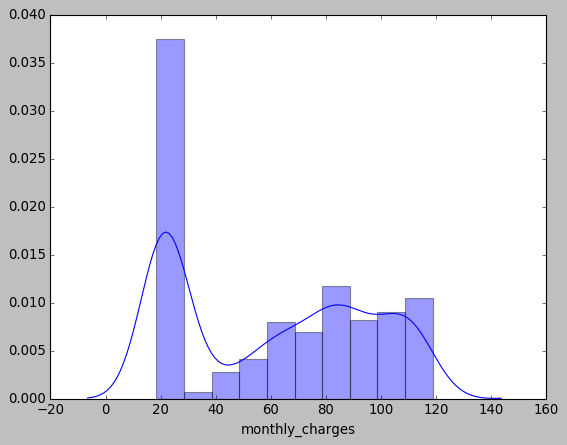

In [211]:
sns.distplot(df.monthly_charges)

Create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

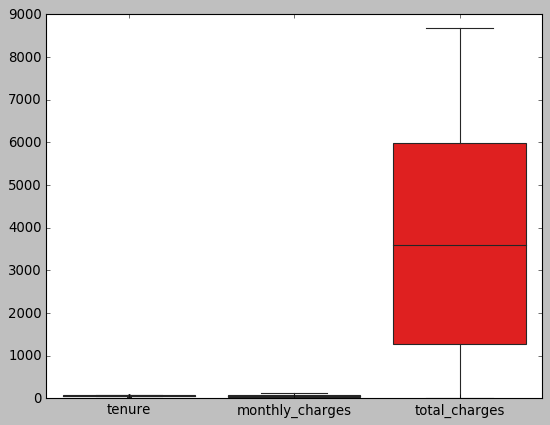

In [213]:
sns.boxplot(data=df.drop(columns=['customer_id']))

Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [214]:
# test_train_split
X = df.drop(['total_charges','customer_id'], axis=1)
y = df[['total_charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## 3. Using the in-sample data (X_train and y_train)

Create a scatterplot for each combination of variables.

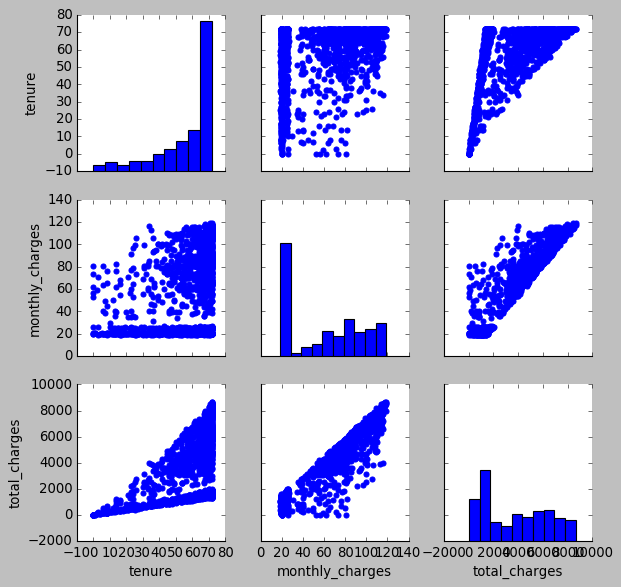

In [215]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Create a heatmap containing the 3 variables.

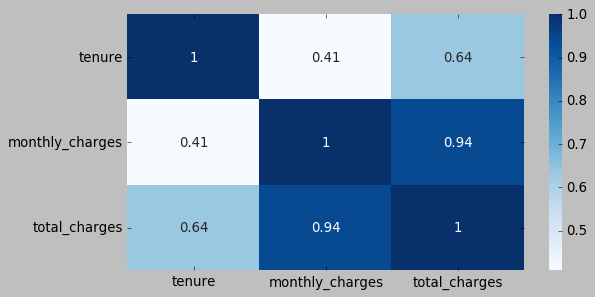

In [216]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"

In [217]:
stats.pearsonr(df.monthly_charges, df.total_charges)

(0.9418038922762754, 0.0)

In [218]:
stats.pearsonr(df.tenure, df.total_charges)

(0.6355631513016043, 1.8478127591140834e-192)

Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [260]:
lm1 = LinearRegression(fit_intercept=False)

What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.

What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.

Write the linear function in the form of y = mx + b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

In [261]:
lm1.fit(X_train[['tenure']], y_train)
lm1_y_intercept = lm1.intercept_
lm1_coefficients = lm1.coef_

In [262]:
print('Univariate - total_charges = b + m * tenure')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - total_charges = b + m * tenure
    y-intercept (b): 0.00
    coefficient (m): 67.82



Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [274]:
y_pred_lm1 = lm1.predict(X_train[['tenure']])

Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

In [275]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 4.21e+06


In [276]:
mae_lm1 = median_absolute_error(y_train, y_pred_lm1)
print("lm1\n  mae: {:.3}".format(mse_lm1)) 

lm1
  mae: 4.21e+06


In [277]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print("lm1\n  r2: {:.3}".format(r2_lm1)) 

lm1
  r2: 0.375


## 4. Using the out-of-sample data (X_test, y_test)

Test your model on the test sample.

In [299]:
y_pred_lm1 = lm1.predict(X_test[['tenure']])

Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [292]:
mse = mean_squared_error(y_test, y_pred_lm1)
print("Mean squared error: %.2f" % mse)

Mean squared error: 3881232.75


Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [293]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:13:59   Log-Likelihood:                -11134.
No. Observations:                1356   AIC:                         2.227e+04
Df Residuals:                    1354   BIC:                         2.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              7.7532      0.885      8.764      0.000       6.018       9.489
monthly_charges    57.4366      0.752     76.399      0.000      55.962      58.911
==============================================================================
Omnibus:                      233.389   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.251
Skew:                          -0.961   Prob(JB):                    4.37e-116
Kurtosis:                       5.390   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a scatter plot of the predicted values versus the actual values in the test sample.

Text(0.5, 1.0, 'Predicted vs Actual Total Charges')

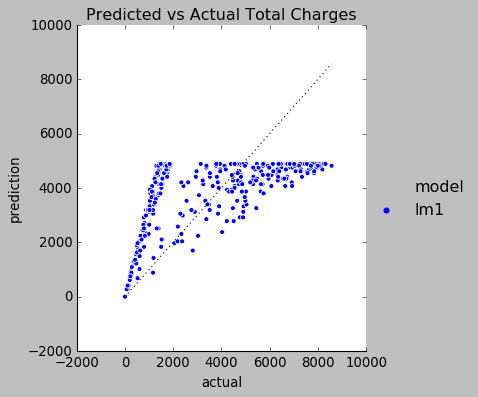

In [294]:
pd.DataFrame({'actual': y_test.total_charges,
              'lm1': y_pred_lm1.ravel(),})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([0, 8564.57], [0, 8564.57], c='black', ls=':')
plt.title('Predicted vs Actual Total Charges')

Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

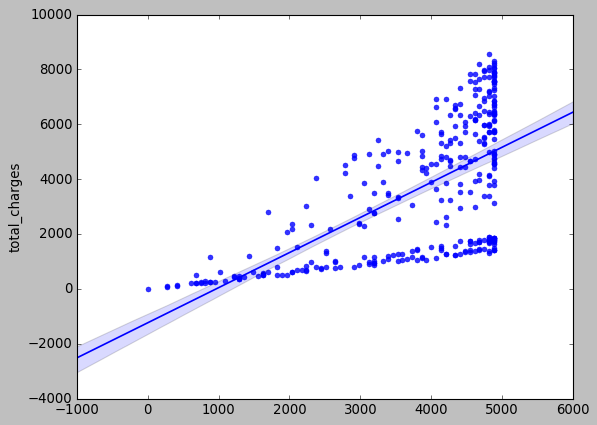

In [300]:
sns.regplot(y_pred_lm1, y_test.total_charges, data=df);

Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

Text(0, 0.5, 'Residuals')

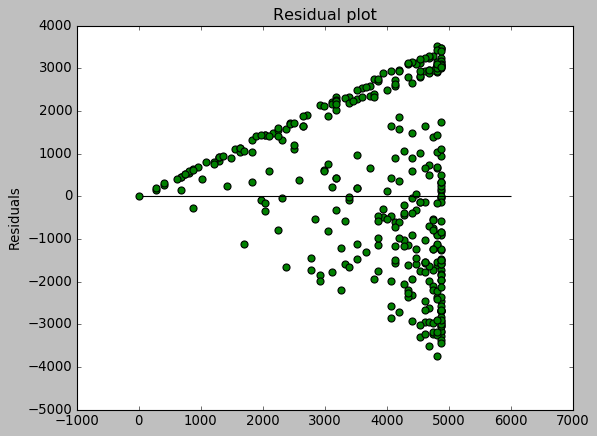

In [283]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=6000)
plt.title("Residual plot")
plt.ylabel('Residuals')